In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('imbalanced_ratio_dataset3.csv')
df

,Review,Rating
0,I do love this shirt. It's very flattering and...,4.0
1,I just received this today. I found the fit to...,5.0
2,These are NOT Wrangler Willow jeans. These are...,2.0
3,"Great fabric, soft, and 100% giftable!",4.0
4,I have been looking for a long jacket with per...,5.0
...,...,...
17115,I really like these. they're not too distresse...,4.0
17116,This rich color is so flattering! i also love...,4.0
17117,Definitely pj quality. i have a fairly thin fr...,3.0
17118,"After only 5 months, these jeans have started ...",1.0


In [98]:
df['Rating'].value_counts()

Rating
4.0    5136
3.0    4280
5.0    3424
2.0    2568
1.0    1712
Name: count, dtype: int64

In [168]:
# Create a new column for word count
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

# Group by Rating and find the minimum word count
min_word_count_per_rating = df.groupby('Rating')['word_count'].min()

# Display the result
print("📉 Minimum word count per Rating:")
print(min_word_count_per_rating)

📉 Minimum word count per Rating:
Rating
1.0    1
2.0    1
3.0    1
4.0    1
5.0    1
Name: word_count, dtype: int64


In [169]:
# Create a new column for word count
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))


max_word_count_per_rating = df.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1.0    241
2.0    515
3.0    478
4.0    401
5.0    435
Name: word_count, dtype: int64


In [104]:
# Specify the rating you're interested in
target_rating = 1

# Ensure Rating column is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing Review or Rating
df = df.dropna(subset=['Review', 'Rating'])

# Create a word count column
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

# Filter for the target rating
rating_df = df[df['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 1: 1
 Reviews with minimum word count:
            Review  word_count
369          Small           1
4814     Worthless           1
6016          Yuck           1
7228          Ugly           1
7709       Massive           1
10518     Returned           1
10788  See-through           1


In [161]:
# Specify the rating you're interested in
target_rating = 1

# Ensure Rating column is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing Review or Rating
df = df.dropna(subset=['Review', 'Rating'])

# Create a word count column
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

# Filter for the target rating
rating_df = df[df['Rating'] == target_rating]

# Get the max word count for that rating
max_word_count = rating_df['word_count'].max()

# Get the reviews with that max word count
max_reviews = rating_df[rating_df['word_count'] == max_word_count]

# Display
print(f" Max word count for Rating {target_rating}: {max_word_count}")
print(" Reviews with max word count:")
print(max_reviews[['Review', 'word_count']])


 Max word count for Rating 1: 241
 Reviews with max word count:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [160]:
pd.set_option('display.max_colwidth',None)

## visualization of imbalanced data set

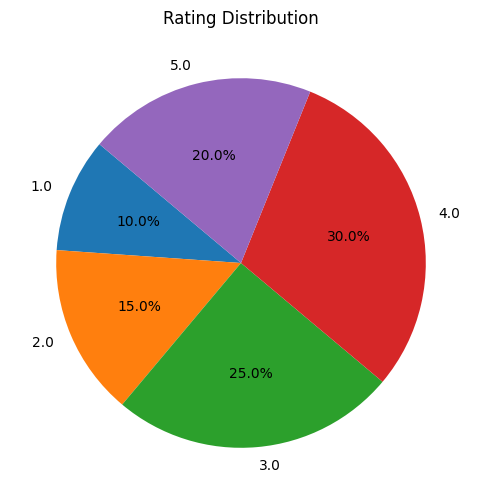

In [105]:
rating_counts = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\3926856831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


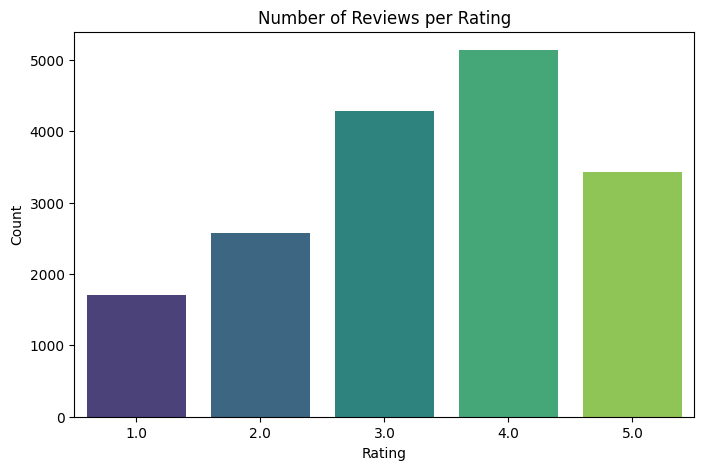

In [106]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2378602375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Word_Count', data=df, palette='Set2')


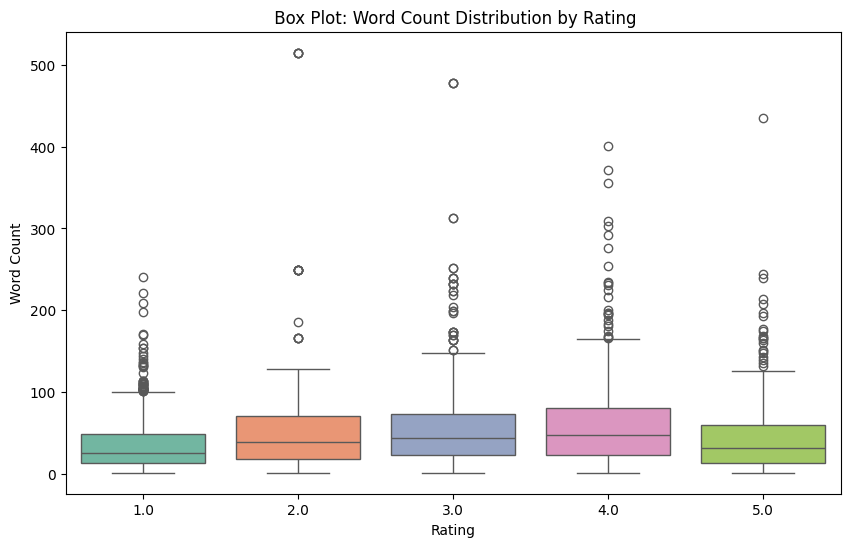

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2378602375.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Rating')


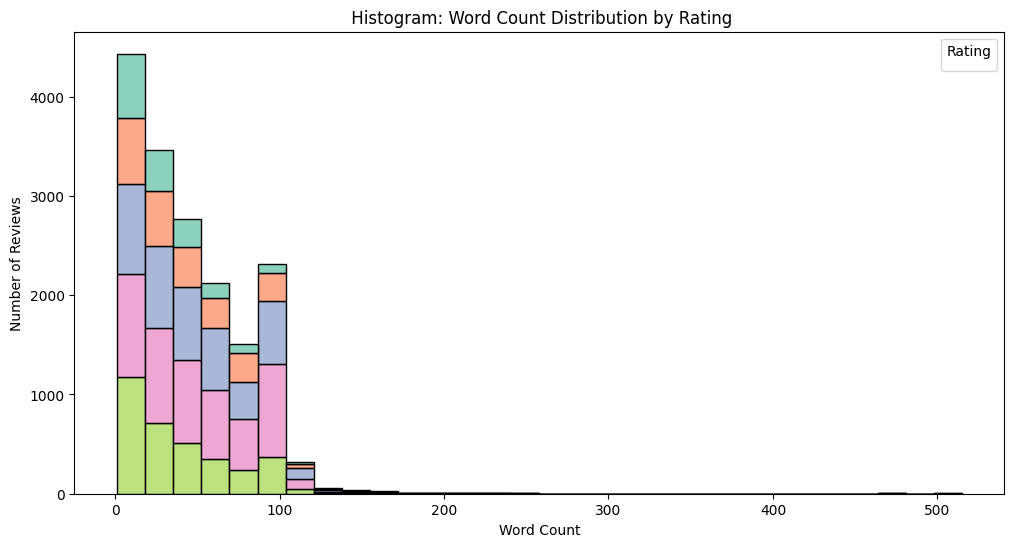

In [107]:
# STEP 1: Add a word count column
df['Word_Count'] = df['Review'].astype(str).apply(lambda x: len(x.split()))

# STEP 2: Box Plot — Word Count Distribution by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Word_Count', data=df, palette='Set2')
plt.title(" Box Plot: Word Count Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

# STEP 3: Histogram — Word Count by Rating
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Word_Count', hue='Rating', multiple='stack', palette='Set2', bins=30)
plt.title(" Histogram: Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.legend(title='Rating')
plt.show()

In [108]:
word_count_by_rating = df.groupby('Rating')['Word_Count'].sum()

# Step 3: Display the result
print(" Total Word Count per Rating:\n")
print(word_count_by_rating)

 Total Word Count per Rating:

Rating
1.0     58703
2.0    118107
3.0    214565
4.0    266250
5.0    135999
Name: Word_Count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\1579722604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


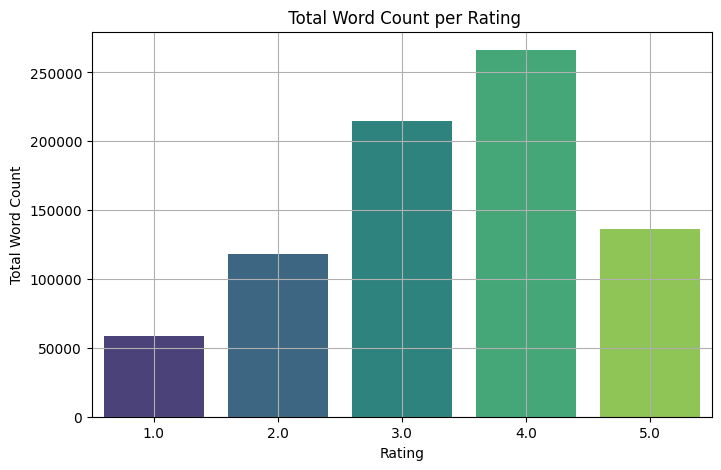

In [109]:
word_count_by_rating = df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

## samples of each rating in imbalanced dataset

In [110]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 1:

1. I wore these pants to work and looked great! however the first time i put them through the wash they became all discolored and are completely stained and now are unwearable. very disappointing. did not spend that much money to wear a pair of pants once.

2. This sweater is enormous. I expected it to be oversized, but I ordered a size small (5’6, 125lbs) and it fit like an XL. The sweater also had a very bad smell to it. Returning.

3. This thing runs extremely hot, is massively oversized, and doesn’t feel soft and silky on the inside at all. Returning it.

4. Absolutely no stretch, very stiff and thick material, way too short, and shrinks quickly. Selling this item on Poshmark if anyone is interested at a discounted price @homeandcloset.

5. Retailer consistently provides unique, sophisticated and quality made clothing. with the exception of an occasional purchase at their sister companies, i shop with them exclusively. i suppose that i can'

In [111]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 2:

1. The  color  was  not  white  it was off white  and  the  fabric was very  flimsy

2. This is such a beautiful dress.  but have to return for the reasons others have noted.  the chest does not fit well.

3. not perma press!has to be ironed!

4. I like the design of the dress, but the fabric makes it look cheap. for an expensive dress, i had expected better quality.

5. Must return. It looked just right on the model and an embarrassment on me. Even after wash/dry on delicate and immediate dryer removal it was too wrinkled to wear without ironing. Reread the fabric description on Amazon...says "polyester and spandex", but the tag on the blouse includes RAYON. This would have to be ironed before wearing. Sooo disappointing.



In [112]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 3:

1. Couldn't wait for this sweater to arrive. i love oversized sweaters for the fall! unfortunately this sweater is extremely itchy that it has to be returned :(

2. As much as i had wanted this to work for me, it didn't. fabric is not as soft as i had expected and quality is just bad. i purchased this online (on sale at $29.95) and i had envisioned this to be comfy stretchy and swingy with a flow. i sent this back to the store as it didn't seem fit even at the low price.

3. I wore it.  Probably will find its way into a give-away bag.  Just too swingy; too much fabric.  Not for the short gals; not for the busty gals; not for the self-conscious "hope no one is staring at my middle" gals.

4. Ordered medium as usual, way small

5. I first have to agree with other reviewers about the quality of this sweater: the stitch is pretty, but the fabric isn't nearly as soft as i expected. it has the look and feel of a cheaper sweater. that said, the fit is

In [113]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 4:

1. I was looking for some comfortable but still stylish shorts for the weekend. these hit the mark!

2. Las medidas se ajustan perfectamente con la realidad

3. Ordered both the black and white and ordered both in 0 and p2. preferred the black over white and the p2 fit the best. however, they reminded me too much of a maternity top so they both went back. 
if you order you will need to wear a cami underneath?at least i would. not a terrible top, just not for me.

4. Just note the pink is different than in the photos. much hotter/more saturated. apart from that surprise, overall i'd recommend. nice design.

5. Like another reviewer said this was too baggy up top. the bottom length was good but arm holes were big and top was just too large. i'm 5'5" 110 lbs and got xs. returned.



In [114]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = df[df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 5:

1. Fit like regular wranglers but with some added stretch in the waits for those thanksgiving dinners!

2. I saw this duster and immediately ordered it in cream. i have worn it every chance i get. it goes well with dresses as well as shorts or jeans. the length is perfect, the design is flattering, and the material is soft and comfortable. the sleeves are snug- but i like this feature, especially for light weight summer use over a tank top or sleeveless blouse. this will be a go to item. thanks retailer- another gem!

3. good fabric greatfit and the price is right

4. Very nice.  Material is comfortable.

5. So I knew that the pajama bottoms had squirrels on them, but no idea that those squirrels were wearing scarves, ear muffs, Santa hats and booties!  I adore the pattern!  I ordered the size L because I like my jammies loose.  I’d say that the sizing runs a little small because I thought the top might be a little too big (I’m bigger on the bo

## train and test split

In [115]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x=df['Review']
y=df['Rating']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## visualization of y_train and y_test

In [119]:
y_train.value_counts()

Rating
4.0    4109
3.0    3424
5.0    2739
2.0    2054
1.0    1370
Name: count, dtype: int64

In [120]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\2621185537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=train_df, palette='viridis')


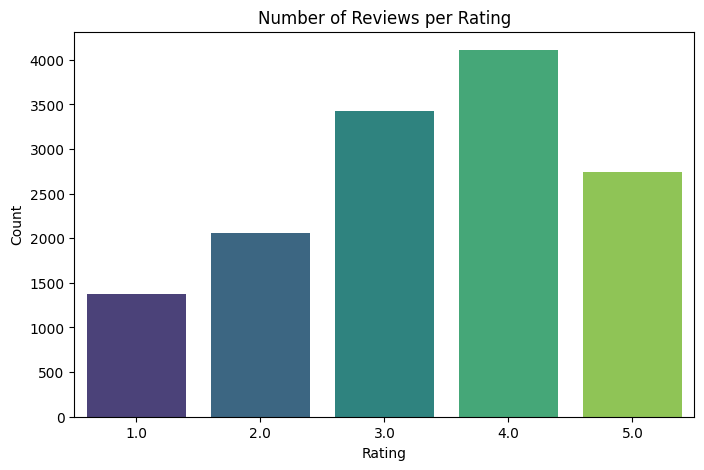

In [121]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=train_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [122]:
train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\3536735248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


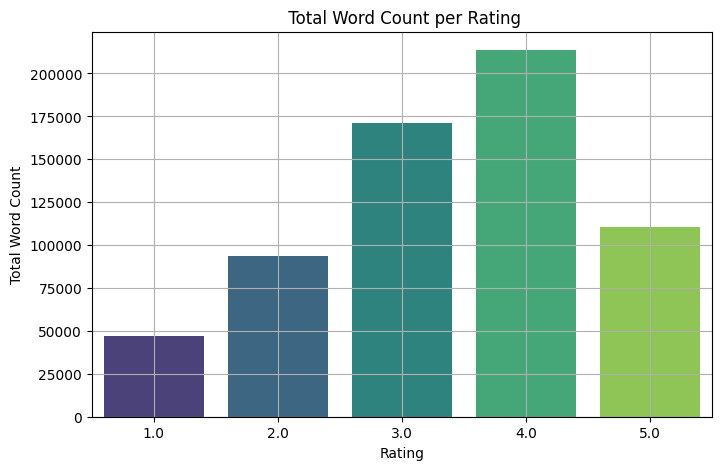

In [123]:
word_count_by_rating = train_df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

In [124]:
y_test.value_counts()

Rating
4.0    1027
3.0     856
5.0     685
2.0     514
1.0     342
Name: count, dtype: int64

In [125]:
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\574291667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=test_df, palette='viridis')


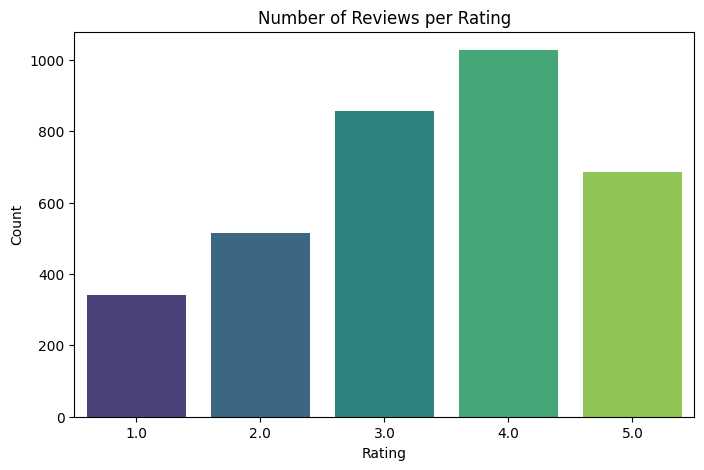

In [126]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=test_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [127]:
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\4258918706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')


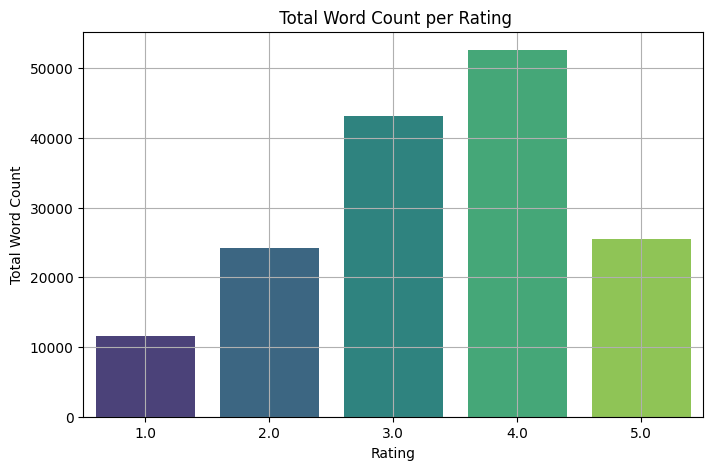

In [128]:
word_count_by_rating = test_df.groupby('Rating')['Word_Count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='Word_Count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

## samples of each rating in test dataset

In [129]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 1:

1. This shirt didn’t fit correctly so I returned it. I dropped it off at UPS 8/2 and they never refunded me.

2. I really liked this shirt the one time i got to wear it...but when i washed it, according to the directions on the tag, it shrunk! a lot! the sleeves are now too tight, and it is much shorter. thinking about returning it to the store, but in any case, i cannot wear it again.

3. I have the purple jacket is short on sleeves and pants were short to very disappointed I have the black,red and grey and they fitted perfectly I don’t understand why this purple suit was made like this and they are all the same size smh

4. Oh I am so, so, sad. I thought I had found the perfect jeans. I bought a pair about a year ago and loved them. So, I ordered these. Imagine my surprise when I realized there were no front pockets. I mean. Really? I do not want to carry a purse or wear more layers of clothes. I want to feel skinny in a pair of jeans, and ha

In [130]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 2:

1. 👎🏻

2. Material to heavy for summer.

3. Based on the other reviews, i sized down from my usual 6p to a 2p, but this dress was still ridiculously huge and extremely unflattering. i could tell the minute i took it out of the package it wouldn't work. i can't imagine this would flatter very many people. the front photo of the model is incredibly deceptive. very disappointed--this will be going back for sure.

4. Advertised as loose fit, but definitely snug and way too short.

5. Not too fond of the material and the way it looks like a rain coat



In [131]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 3:

1. Pants were fine but pockets ripped immediately. Only buy if you know how to sew.

2. I love the fabric however the overall fit did not work for me. 
i think the arms are much smaller than the overall shirt.

3. The look and feel of the swim trunks are great but the quality should be higher for the price. After one wash and wear the waist band stitching started to come loose. I would expect some wear and tear after several uses but not after one.

4. Did not like fabric, does not drape well.

5. The wrong color was sent to me. I kept them anyways, but I’m not crazy about the fit of these. The tag on the outside waistband somehow digs up into my skin when i sit, making it mildly uncomfortable. They are a nice Jean quality though.



In [132]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 4:

1. The fabric is nice and the color is a rich jewel-tone. i have a couple of very similar shirts from a similar store that are several years old. those fit a bit more loss sly around the stomach (not baggy, just body-skimming) which made them more flattering for more body types. this shirt works if you have a little padding because of the gathered folds, but it probably wouldn't be great for someone carrying a lot of extra weight around their middle. the knot also has a tendency to twist exposing t

2. Style is perfect, year around wear.

3. Bought these in 28 had to return for a 27p . love them!! i order the 2 other colors

4. I really love the look of this sweater and it seems to be of great quality. i will say the fit is a bit odd. the sweater is on the short side but is very roomy through the neck and shoulders. i ordered a small (5'6"; 120lbs) and would change for an xs but i'm afraid it would be cropped. i'm keeping it but wish it had a m

In [133]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = test_df[test_df['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")



 Showing 5 sample reviews for Rating 5:

1. Very comfortable and fits well.

2. This top is really pretty and nice quality. runs big - i went down a size, and its perfect. coloring is more subtle in person than in the photo.

3. Happy with fit and quality

4. As a full time photographer, I am always looking for breathable, cute and professional shirts to wear to sessions and weddings. I love this shirt, and it’s honestly perfect for every occasion. Time to go buy it in every color lol

5. I love how versatile this dress is! Listen to the reviews as if you do have a little bit of a belly or pooch, def size up. I’m normally a 4, 5’9 and weight 150 pounds. I ordered the 8-10 and I’m so glad I did. Fits very well- may have to wear spanx only bc I do not have a flat stomach. If you do, order your normal size. Fits very well in the chest and the rest of my body.



## preprocessing

In [134]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [135]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [136]:
X_train=X_train.apply(clean_text)

## stopword removal and lemmatization

In [137]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [138]:
# Print all stop words
print(" Total stop words:", len(nlp.Defaults.stop_words))
print(" Stop words list:")
print(sorted(nlp.Defaults.stop_words))

 Total stop words: 326
 Stop words list:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 

In [139]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [140]:
X_train=X_train.apply(cleaning)

In [141]:
#removing punctuations and making lower case
X_test = X_train.str.lower()
X_test = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [142]:
X_test=X_test.apply(clean_text)

In [143]:
X_test=X_test.apply(cleaning)

In [144]:
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

In [145]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})

In [147]:
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))

In [148]:
train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))

In [149]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

train_df = train_df[(train_df['Word_Count'] >= 3) & (train_df['Word_Count'] <= 100)]
 

X_train = train_df['Review']
y_train = train_df['Rating']

In [150]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

test_df = test_df[(test_df['Word_Count'] >= 3) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

In [172]:


# Group by Rating and find the minimum word count
min_word_count_per_rating = train_df.groupby('Rating')['Word_Count'].min()

# Display the result
print(" Minimum word count per Rating:")
print(min_word_count_per_rating)

 Minimum word count per Rating:
Rating
1.0    3
2.0    3
3.0    3
4.0    3
5.0    3
Name: Word_Count, dtype: int64


In [157]:

# Specify the rating you're interested in
target_rating = 1

# Ensure Rating column is numeric
train_df['Rating'] = pd.to_numeric(train_df['Rating'], errors='coerce')



# Filter for the target rating
rating_df = train_df[train_df['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['Word_Count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['Word_Count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'Word_Count']])


 Minimum word count for Rating 1: 3
 Reviews with minimum word count:
                             Review  Word_Count
982               want knit sweater           3
5360                  run way small           3
9679              zipper snaggs bad           3
12069           poor quality fabric           3
12145              spend money away           3
3215              receive vest pant           3
2865               order small size           3
3347           cheap fabric cheaply           3
1150              shirt huge return           3
12498                not like style           3
9860             zipper break month           3
3240                small true size           3
4488                 not buy poorly           3
13892              dress tight thin           3
8286              wrinkle easy iron           3
7982         material soft flexible           3
2084             super itchy return           3
11919            shirt picture show           3
16792             

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\939760590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Rating'] = pd.to_numeric(train_df['Rating'], errors='coerce')


In [173]:



max_word_count_per_rating = train_df.groupby('Rating')['Word_Count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1.0     99
2.0     79
3.0    100
4.0     97
5.0     98
Name: Word_Count, dtype: int64


In [162]:

# Specify the rating you're interested in
target_rating = 1

# Ensure Rating column is numeric
train_df['Rating'] = pd.to_numeric(train_df['Rating'], errors='coerce')



# Filter for the target rating
rating_df = train_df[train_df['Rating'] == target_rating]


max_word_count = rating_df['Word_Count'].max()


max_reviews = rating_df[rating_df['Word_Count'] == max_word_count]

# Display
print(f" Max word count for Rating {target_rating}: {max_word_count}")
print(" Reviews with max word count:")
print(max_reviews[['Review', 'Word_Count']])


 Max word count for Rating 1: 99
 Reviews with max word count:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Review  \
3210  straight talk you make boob look super droopy maybe defect receive look photo wear wellfitte bra shot way lacy material attach loosely sloppily make look like girl see lot decade actually not believe take photo right perspective wear exact bra booby old lady shot like dress shot sincerely hope m old tell improve change size dress 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12484\3203327385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Rating'] = pd.to_numeric(train_df['Rating'], errors='coerce')


## TF-IDF

In [163]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [164]:
# create a tfidf vectorizer matrix
tv = TfidfVectorizer()
Xtrain = tv.fit_transform(X_train)

In [165]:
X = pd.DataFrame(Xtrain.toarray(), columns=tv.get_feature_names_out())
X

,00,000,002first,00p,02,025,04,045blue,045purple,0dd,...,zipper,zippered,zipperi,zipperit,zipperone,zips,zipup,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.444043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:

Xtest = tv.fit_transform(X_test)

In [167]:
Y = pd.DataFrame(Xtest.toarray(), columns=tv.get_feature_names_out())
Y

,00,000,002first,00p,02,025,04,045blue,045purple,0dd,...,zipper,zippered,zipperi,zipperit,zipperone,zips,zipup,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
